In [467]:
from citipy import citipy
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as requests
import os
import json
import random

In [566]:
file_name = os.path.join("Resources","worldcities.csv")
world_cities_pd = pd.read_csv(file_name)


In [594]:
selected_cities = world_cities_pd.sample(n=10, random_state = 1)
selected_cities

,Country,City,Latitude,Longitude
4943,in,binika,21.033333,83.800000
2566,ru,ayan,56.450000,138.166667
30331,br,panelas,-8.666667,-36.016667
15071,hu,gyongyospata,47.815049,19.789245
46631,pl,zielonka,52.303157,21.158459
9621,us,country club hills,41.568056,-87.720278
41651,pe,tingo maria,-9.300000,-75.983333
33894,hu,ricse,48.325645,21.970694
1645,be,anzegem,50.833333,3.466667
32586,mx,progreso,32.580000,-115.583889


In [595]:
weather_cities_df = selected_cities
weather_cities_df

,Country,City,Latitude,Longitude
4943,in,binika,21.033333,83.800000
2566,ru,ayan,56.450000,138.166667
30331,br,panelas,-8.666667,-36.016667
15071,hu,gyongyospata,47.815049,19.789245
46631,pl,zielonka,52.303157,21.158459
9621,us,country club hills,41.568056,-87.720278
41651,pe,tingo maria,-9.300000,-75.983333
33894,hu,ricse,48.325645,21.970694
1645,be,anzegem,50.833333,3.466667
32586,mx,progreso,32.580000,-115.583889


In [596]:
cities_list = list(weather_cities_df["City"])
cities_list

['binika',
 'ayan',
 'panelas',
 'gyongyospata',
 'zielonka',
 'country club hills',
 'tingo maria',
 'ricse',
 'anzegem',
 'progreso']

In [597]:
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = url + "appid=" + api_key + "&units=" + units + "&q=" 

In [598]:
weather_data = []

for city in cities_list:
    response = requests.get(query_url + city).json()
    weather_data.append(response)

In [599]:
weather_data

[{'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 21.03, 'lon': 83.8},
  'dt': 1517037964,
  'id': 1275558,
  'main': {'grnd_level': 1009.41,
   'humidity': 63,
   'pressure': 1009.41,
   'sea_level': 1028.23,
   'temp': 74.73,
   'temp_max': 74.73,
   'temp_min': 74.73},
  'name': 'Binika',
  'sys': {'country': 'IN',
   'message': 0.0032,
   'sunrise': 1517014990,
   'sunset': 1517055129},
  'weather': [{'description': 'clear sky',
    'icon': '01d',
    'id': 800,
    'main': 'Clear'}],
  'wind': {'deg': 23.5007, 'speed': 4.61}},
 {'base': 'stations',
  'clouds': {'all': 8},
  'cod': 200,
  'coord': {'lat': 40.67, 'lon': 33.6},
  'dt': 1517037612,
  'id': 749747,
  'main': {'grnd_level': 887.09,
   'humidity': 78,
   'pressure': 887.09,
   'sea_level': 1044.52,
   'temp': 11.33,
   'temp_max': 11.33,
   'temp_min': 11.33},
  'name': 'Ayan',
  'sys': {'country': 'TR',
   'message': 0.008,
   'sunrise': 1517029195,
   'sunset': 1517065036},
  'weather': [{'

In [600]:
weather_cities_df["Temperature F"] = ""
weather_cities_df["Humidity %"] = ""
weather_cities_df["Cloudiness %"] = ""
weather_cities_df["Wind Speed mph"] = ""   


In [601]:
temp_data = [data.get("main", {}).get("temp", {}) for data in weather_data]
temp_data

[74.73, 11.33, 68.21, 26.6, 37.4, 49.17, 64.65, 34.68, 38.79, 66.2]

In [602]:
hum_data = [data.get("main", {}).get("humidity", {}) for data in weather_data]
hum_data

[63, 78, 95, 100, 86, 66, 90, 86, 93, 77]

In [603]:
cloud_data = [data.get("clouds", {}).get("all", {}) for data in weather_data]
cloud_data

[0, 8, 92, 20, 90, 90, 68, 75, 90, 0]

In [604]:
wind_data = [data.get("wind", {}).get("speed", {}) for data in weather_data]
wind_data


[4.61, 3.27, 3.6, 3.36, 4.7, 20.8, 1.81, 6.93, 4.7, 6.93]

In [605]:
row_count = 1
city_info = []
city_info = list(weather_cities_df['City'])


for index, row in weather_cities_df.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?/" + "appid=" + api_key + "&units=" + units + "&q=" + (row["City"].replace(" ","+"))
    
    print("Now retrieving info for city #" +str(row_count) )
    print(target_url)
    row_count += 1

Now retrieving info for city #1
http://api.openweathermap.org/data/2.5/weather?/appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=binika
Now retrieving info for city #2
http://api.openweathermap.org/data/2.5/weather?/appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ayan
Now retrieving info for city #3
http://api.openweathermap.org/data/2.5/weather?/appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=panelas
Now retrieving info for city #4
http://api.openweathermap.org/data/2.5/weather?/appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=gyongyospata
Now retrieving info for city #5
http://api.openweathermap.org/data/2.5/weather?/appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=zielonka
Now retrieving info for city #6
http://api.openweathermap.org/data/2.5/weather?/appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=country+club+hills
Now retrieving info for city #7
http://api.openweathermap.org/data/2.5/weather?/appid=25bc90a1196e6f153eece0bc0b0fc9eb&unit

In [606]:
weather_cities_df["Temperature F"] = temp_data
weather_cities_df["Humidity %"] = hum_data
weather_cities_df["Cloudiness %"] = cloud_data
weather_cities_df["Wind Speed mph"] = wind_data
#weather_cities_df["Temperature F"].replace('{}', np.nan)
#weather_cities_df['Temperature F'].replace(["Nan"], value="0", inplace=True)
weather_cities_df

,Country,City,Latitude,Longitude,Temperature F,Humidity %,Cloudiness %,Wind Speed mph
4943,in,binika,21.033333,83.800000,74.73,63,0,4.61
2566,ru,ayan,56.450000,138.166667,11.33,78,8,3.27
30331,br,panelas,-8.666667,-36.016667,68.21,95,92,3.60
15071,hu,gyongyospata,47.815049,19.789245,26.60,100,20,3.36
46631,pl,zielonka,52.303157,21.158459,37.40,86,90,4.70
9621,us,country club hills,41.568056,-87.720278,49.17,66,90,20.80
41651,pe,tingo maria,-9.300000,-75.983333,64.65,90,68,1.81
33894,hu,ricse,48.325645,21.970694,34.68,86,75,6.93
1645,be,anzegem,50.833333,3.466667,38.79,93,90,4.70
32586,mx,progreso,32.580000,-115.583889,66.20,77,0,6.93


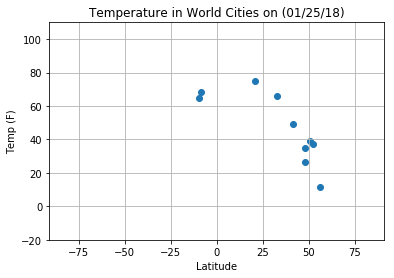

In [621]:
plt.scatter(weather_cities_df['Latitude'], weather_cities_df['Temperature F'], marker='o')
plt.title("Temperature in World Cities on (01/25/18)")
plt.ylabel("Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-91,91)
plt.ylim(-20,110)
plt.savefig("temp_in_cities.png")
plt.show()

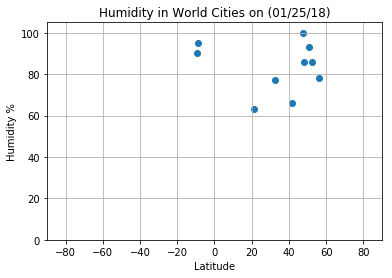

In [622]:
plt.scatter(weather_cities_df['Latitude'], weather_cities_df['Humidity %'], marker='o')
plt.title("Humidity in World Cities on (01/25/18)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(0,105)
plt.savefig("hum_in_cities.png")
plt.show()

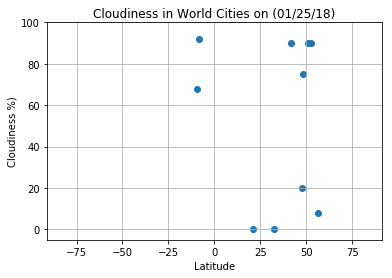

In [623]:
plt.scatter(weather_cities_df['Latitude'], weather_cities_df['Cloudiness %'], marker='o')
plt.title("Cloudiness in World Cities on (01/25/18)")
plt.ylabel("Cloudiness %)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-91,91)
plt.ylim(-5,100)
plt.savefig("cloud_in_cities.png")
plt.show()

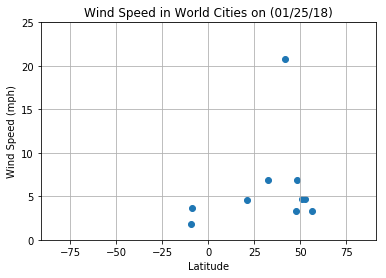

In [617]:
plt.scatter(weather_cities_df['Latitude'], weather_cities_df['Wind Speed mph'], marker='o')
plt.title("Wind Speed in World Cities on (01/25/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-91,91)
plt.ylim(0,25)
plt.grid(True)
plt.savefig("wind_in_cities.png")
plt.show()

In [624]:
#According to the cloudiness in world cities chart, more cities above the equator had cloudiness than below.
#According to the wind speed in world cities plot, majority of the cities had windspeeds below 10 mph.
#According to the temperature vs latitude scatterplot, it appears that most of the cities decreased in temperature as it got further away from the equator during the winter.

In [625]:
weather_cities_df.to_csv("weather_cities_data.csv", encoding="utf-8", index=False)